In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans


## Visualization of dataset

In [2]:
df=pd.read_csv('CityGlobalTemperature2000-2009.csv') 

In [3]:
df

Unnamed: 0  AverageTemperature  AverageTemperatureUncertainty     City  \
0            1813              27.685                          0.267  Abidjan   
1            1814              29.061                          0.224  Abidjan   
2            1815              28.162                          0.478  Abidjan   
3            1816              27.547                          0.509  Abidjan   
4            1817              25.812                          0.231  Abidjan   
...           ...                 ...                            ...      ...   
11995      239128              18.459                          0.374     Xian   
11996      239129              14.195                          0.163     Xian   
11997      239130               2.916                          0.675     Xian   
11998      239131              -0.712                          0.259     Xian   
11999      239132              -0.237                          0.554     Xian   

             Country Latitude Longitude        time  
0      Côte D'Ivoire    5.63N     3.23W  2000-02-01  
1      Côte D'Ivoire    5.63N     3.23W  2000-03-01  
2      Côte D'Ivoire    5.63N     3.23W  2000-04-01  
3      Côte D'Ivoire    5.63N     3.23W  2000-05-01  
4      Côte D'Ivoire    5.63N     3.23W  2000-06-01  
...              ...      ...       ...         ...  
11995          China   34.56N   108.97E  2009-09-01  
11996          China   34.56N   108.97E  2009-10-01  
11997          China   34.56N   108.97E  2009-11-01  
11998          China   34.56N   108.97E  2009-12-01  
11999          China   34.56N   108.97E  2010-01-01  

[12000 rows x 8 columns]

In [4]:
df['Latitude'] = df['Latitude'].map(lambda x: x.replace("N", ""))
df['Longitude'] = df['Longitude'].map(lambda x: x.replace("E", ""))


In [5]:
df['Longitude'] = df['Longitude'].map(lambda x: "-"+x if "W" in x else x)
df['Latitude'] = df['Latitude'].map(lambda x: "-"+x if "S" in x else x)
df['Latitude'] = df['Latitude'].map(lambda x: x.replace("S", ""))
df['Longitude'] = df['Longitude'].map(lambda x: x.replace("W", ""))

In [6]:
df.head()

Unnamed: 0  AverageTemperature  AverageTemperatureUncertainty     City  \
0        1813              27.685                          0.267  Abidjan   
1        1814              29.061                          0.224  Abidjan   
2        1815              28.162                          0.478  Abidjan   
3        1816              27.547                          0.509  Abidjan   
4        1817              25.812                          0.231  Abidjan   

         Country Latitude Longitude        time  
0  Côte D'Ivoire     5.63     -3.23  2000-02-01  
1  Côte D'Ivoire     5.63     -3.23  2000-03-01  
2  Côte D'Ivoire     5.63     -3.23  2000-04-01  
3  Côte D'Ivoire     5.63     -3.23  2000-05-01  
4  Côte D'Ivoire     5.63     -3.23  2000-06-01

In [7]:
df['C_C']=df['City']+" "+df['Country']

In [8]:
time=df.time.unique()

In [9]:
times=list(time)

In [10]:
df.describe()

Unnamed: 0  AverageTemperature  AverageTemperatureUncertainty
count   12000.000000        12000.000000                   12000.000000
mean   121394.670000           19.708932                       0.362474
std     69143.708067            9.502997                       0.203973
min      1813.000000          -23.495000                       0.056000
25%     62527.500000           14.829000                       0.234000
50%    120939.000000           22.077000                       0.316000
75%    181756.500000           26.931000                       0.427000
max    239132.000000           38.283000                       2.854000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     12000 non-null  int64  
 1   AverageTemperature             12000 non-null  float64
 2   AverageTemperatureUncertainty  12000 non-null  float64
 3   City                           12000 non-null  object 
 4   Country                        12000 non-null  object 
 5   Latitude                       12000 non-null  object 
 6   Longitude                      12000 non-null  object 
 7   time                           12000 non-null  object 
 8   C_C                            12000 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 843.9+ KB


In [12]:
pd.set_option("max_rows", None)
s=df.drop_duplicates(['City','Country'])
s=s[['City','Country']]
#Piu citta' di una stessa nazione

In [14]:
dataframe_collection = {}
AverageTemperature= pd.DataFrame() 
AverageTemperatureUncertainty =pd.DataFrame()
for index, row in s.iterrows():
    #Build a collection of AverageTemperature dataframe
    new_data = df[(df.City==row['City']) & (df.Country==row['Country'])]['AverageTemperature'].values.T
    dataframe_collection[row['City']+" "+ row['Country']] = new_data

In [16]:
AverageTemperature=pd.DataFrame.from_dict(dataframe_collection).T

In [17]:
AverageTemperature = AverageTemperature.set_axis(times, axis=1, inplace=False).T

In [18]:
AverageTemperature

Abidjan Côte D'Ivoire  Addis Abeba Ethiopia  Ahmadabad India  \
2000-02-01                 27.685                19.183           21.246   
2000-03-01                 29.061                20.230           26.565   
2000-04-01                 28.162                20.398           32.275   
2000-05-01                 27.547                19.977           32.847   
2000-06-01                 25.812                18.254           32.490   
2000-07-01                 24.870                17.109           28.678   
2000-08-01                 24.884                16.944           28.616   
2000-09-01                 25.405                17.542           29.087   
2000-10-01                 26.074                17.113           29.285   
2000-11-01                 27.315                17.741           25.577   
2000-12-01                 26.929                17.013           21.785   
2001-01-01                 26.920                17.454           19.770   
2001-02-01                 28.234                18.864           22.438   
2001-03-01                 28.706                20.043           27.198   
2001-04-01                 27.702                20.233           31.034   
2001-05-01                 27.653                19.908           33.358   
2001-06-01                 25.940                17.978           30.717   
2001-07-01                 24.841                17.011           27.730   
2001-08-01                 24.280                17.152           27.893   
2001-09-01                 24.797                17.867           29.490   
2001-10-01                 26.278                18.047           29.073   
2001-11-01                 27.374                17.306           25.516   
2001-12-01                 27.598                17.694           22.160   
2002-01-01                 27.192                17.901           19.831   
2002-02-01                 28.796                19.471           22.333   
2002-03-01                 28.564                20.193           27.885   
2002-04-01                 28.508                20.097           32.020   
2002-05-01                 27.721                20.234           34.317   
2002-06-01                 25.972                18.084           32.522   
2002-07-01                 25.054                17.518           29.698   
2002-08-01                 24.580                17.171           28.036   
2002-09-01                 25.260                17.405           28.558   
2002-10-01                 26.076                17.324           29.507   
2002-11-01                 27.282                17.964           25.437   
2002-12-01                 27.087                18.275           22.485   
2003-01-01                 27.590                18.201           21.006   
2003-02-01                 28.863                19.210           23.304   
2003-03-01                 28.980                20.453           27.331   
2003-04-01                 28.169                20.270           31.887   
2003-05-01                 27.910                20.409           33.511   
2003-06-01                 25.993                18.428           32.268   
2003-07-01                 25.221                16.861           28.952   
2003-08-01                 24.880                17.150           27.820   
2003-09-01                 25.737                17.298           28.009   
2003-10-01                 26.694                17.137           27.927   
2003-11-01                 27.479                17.431           25.657   
2003-12-01                 27.092                17.003           21.174   
2004-01-01                 27.728                18.983           20.143   
2004-02-01                 28.705                18.986           22.730   
2004-03-01                 29.288                19.813           29.174   
2004-04-01                 28.152                19.634           32.250   
2004-05-01                 27.302                20.015     

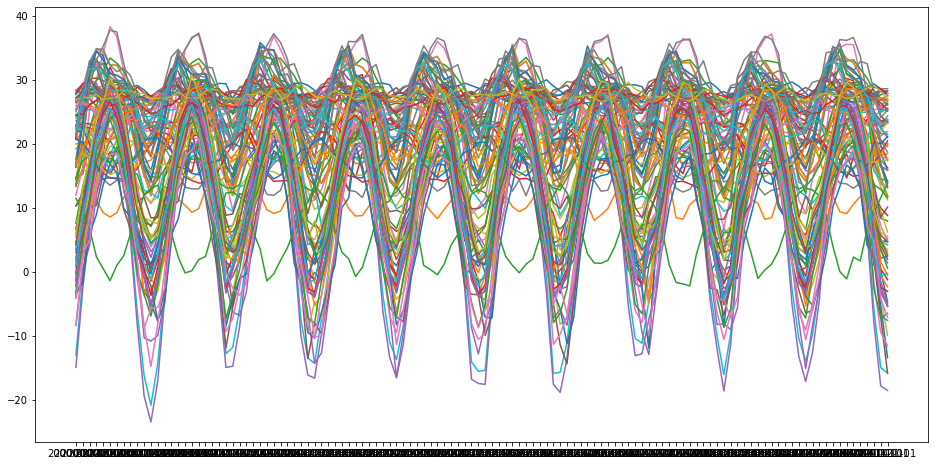

In [20]:
plt.figure(figsize=(16,8))
plt.plot(AverageTemperature)


In [22]:
# Si puo notare il fenomeno della seasonality, come ci aspettavamo, ovvero di un trend che si ripete nel tempo, per la precisione per 10 volte che 
# coincide con i 10 anni descritti dal dataset

## Time series - K MEANS

In [34]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.generators import random_walks
import matplotlib.pyplot as plt

In [35]:
AverageTemperature

Abidjan Côte D'Ivoire  Addis Abeba Ethiopia  Ahmadabad India  \
2000-02-01                 27.685                19.183           21.246   
2000-03-01                 29.061                20.230           26.565   
2000-04-01                 28.162                20.398           32.275   
2000-05-01                 27.547                19.977           32.847   
2000-06-01                 25.812                18.254           32.490   
2000-07-01                 24.870                17.109           28.678   
2000-08-01                 24.884                16.944           28.616   
2000-09-01                 25.405                17.542           29.087   
2000-10-01                 26.074                17.113           29.285   
2000-11-01                 27.315                17.741           25.577   
2000-12-01                 26.929                17.013           21.785   
2001-01-01                 26.920                17.454           19.770   
2001-02-01                 28.234                18.864           22.438   
2001-03-01                 28.706                20.043           27.198   
2001-04-01                 27.702                20.233           31.034   
2001-05-01                 27.653                19.908           33.358   
2001-06-01                 25.940                17.978           30.717   
2001-07-01                 24.841                17.011           27.730   
2001-08-01                 24.280                17.152           27.893   
2001-09-01                 24.797                17.867           29.490   
2001-10-01                 26.278                18.047           29.073   
2001-11-01                 27.374                17.306           25.516   
2001-12-01                 27.598                17.694           22.160   
2002-01-01                 27.192                17.901           19.831   
2002-02-01                 28.796                19.471           22.333   
2002-03-01                 28.564                20.193           27.885   
2002-04-01                 28.508                20.097           32.020   
2002-05-01                 27.721                20.234           34.317   
2002-06-01                 25.972                18.084           32.522   
2002-07-01                 25.054                17.518           29.698   
2002-08-01                 24.580                17.171           28.036   
2002-09-01                 25.260                17.405           28.558   
2002-10-01                 26.076                17.324           29.507   
2002-11-01                 27.282                17.964           25.437   
2002-12-01                 27.087                18.275           22.485   
2003-01-01                 27.590                18.201           21.006   
2003-02-01                 28.863                19.210           23.304   
2003-03-01                 28.980                20.453           27.331   
2003-04-01                 28.169                20.270           31.887   
2003-05-01                 27.910                20.409           33.511   
2003-06-01                 25.993                18.428           32.268   
2003-07-01                 25.221                16.861           28.952   
2003-08-01                 24.880                17.150           27.820   
2003-09-01                 25.737                17.298           28.009   
2003-10-01                 26.694                17.137           27.927   
2003-11-01                 27.479                17.431           25.657   
2003-12-01                 27.092                17.003           21.174   
2004-01-01                 27.728                18.983           20.143   
2004-02-01                 28.705                18.986           22.730   
2004-03-01                 29.288                19.813           29.174   
2004-04-01                 28.152                19.634           32.250   
2004-05-01                 27.302                20.015     

In [36]:
AverageTemperature_of_years=AverageTemperature.reset_index().groupby(pd.DatetimeIndex(AverageTemperature.index).month).mean().T

In [37]:
#calcolo le serie temporali medie sui 10 anni
AverageTemperature_of_years


1        2        3   \
Abidjan Côte D'Ivoire                        27.2104  28.6023  28.9006   
Addis Abeba Ethiopia                         18.2615  19.4287  20.1868   
Ahmadabad India                              20.2431  22.7144  27.5728   
Aleppo Syria                                  6.0204   7.8457  12.4506   
Alexandria Egypt                             14.8878  14.9763  17.1055   
Ankara Turkey                                -0.5166   0.6890   6.0601   
Baghdad Iraq                                 10.1292  12.8136  17.9460   
Bangalore India                              23.5813  25.4295  27.5296   
Bangkok Thailand                             25.6681  27.4768  28.9775   
Belo Horizonte Brazil                        23.4663  23.8092  23.6476   
Berlin Germany                                0.4562   2.4561   5.0283   
Bogotá Colombia                              20.7696  21.0500  20.8581   
Bombay India                                 25.1061  24.9955  26.4467   
Brasília Brazil                              23.0574  22.9338  23.0116   
Cairo Egypt                                  13.7771  14.7848  18.1998   
Calcutta India                               18.8938  22.7020  27.3073   
Cali Colombia                                22.6352  22.8720  22.6939   
Cape Town South Africa                       20.2856  20.8916  19.7468   
Casablanca Morocco                           10.0479  11.7637  14.7485   
Changchun China                             -14.9193  -9.9549  -0.9798   
Chengdu China                                 1.0632   3.9697   8.0755   
Chicago United States                         0.4134   0.8072   4.5805   
Chongqing China                               6.5946   9.2783  13.6031   
Dakar Senegal                                22.2024  21.8482  22.4424   
Dalian China                                 -3.5415  -0.9269   4.4690   
Dar Es Salaam Tanzania                       28.3019  28.3866  28.2827   
Delhi India                                  14.6287  18.4461  24.2649   
Dhaka Bangladesh                             18.6763  22.3412  26.5522   
Durban South Africa                          23.2673  23.9092  23.3807   
Faisalabad Pakistan                          12.4886  16.0664  21.7636   
Fortaleza Brazil                             27.9086  27.0882  26.7820   
Gizeh Egypt                                  13.7771  14.7848  18.1998   
Guangzhou China                              13.3599  15.6940  18.2409   
Harare Zimbabwe                              22.6394  22.4683  22.0917   
Harbin China                                -17.4987 -12.4422  -2.3251   
Ho Chi Minh City Vietnam                     26.2096  26.7430  27.9249   
Hyderabad India                              23.4684  26.1963  29.2717   
Ibadan Nigeria                               27.6741  29.1775  29.4615   
Istanbul Turkey                               5.8377   6.0247   8.7257   
Izmir Turkey                                 10.9851  10.5034  12.9887   
Jaipur India                                 16.0153  19.5146  25.2374   
Jakarta Indonesia                            26.8896  26.8973  27.5409   
Jiddah Saudi Arabia                          23.5042  23.8631  25.3306   
Jinan China                                  -0.6250   2.8558   8.8949   
Kabul Afghanistan                             2.6277   5.1764  10.8725   
Kano Nigeria                                 21.9375  24.9398  29.1994   
Kanpur India                                 14.7986  18.8886  24.4557   
Karachi Pakistan                             18.6408  21.5599  26.3155   
Kiev Ukraine                                 -3.9528  -3.1946   2.1623   
Kinshasa Congo (Democratic Republic Of The)  24.9074  25.2713  25.6781   
Lagos Nigeria                                26.9545  27.7592  28.1375   
Lahore Pakistan                              12.4886  16.0664  21.7636   
Lakhnau India                                14.7986  18.8886  24.4557   
Lima Peru                                    20.4152  

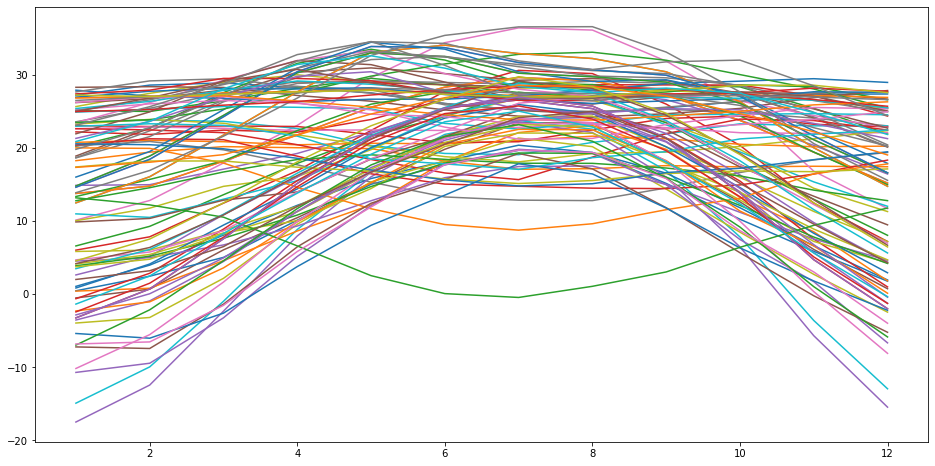

In [38]:
plt.figure(figsize=(16,8))
plt.plot(AverageTemperature_of_years.T)

In [39]:
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance,TimeSeriesResampler

In [40]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AverageTemperature_of_years)

In [42]:
#metodo Usato in lab
#Con metric Euclidean
sil_list = list()
sse_list = list()
max_k = 40
for k in range(2, max_k + 1):
    kmeans = TimeSeriesKMeans(n_clusters=k, metric="euclidean", n_init=3, max_iter=300)
    kmeans.fit(X_train)
    sse = kmeans.inertia_
    sse_list.append(sse)
    #sil=silhouette_score(X_train, kmeans.labels_)
    #sil_list.append(sil)

In [43]:
len(sil_list)

0

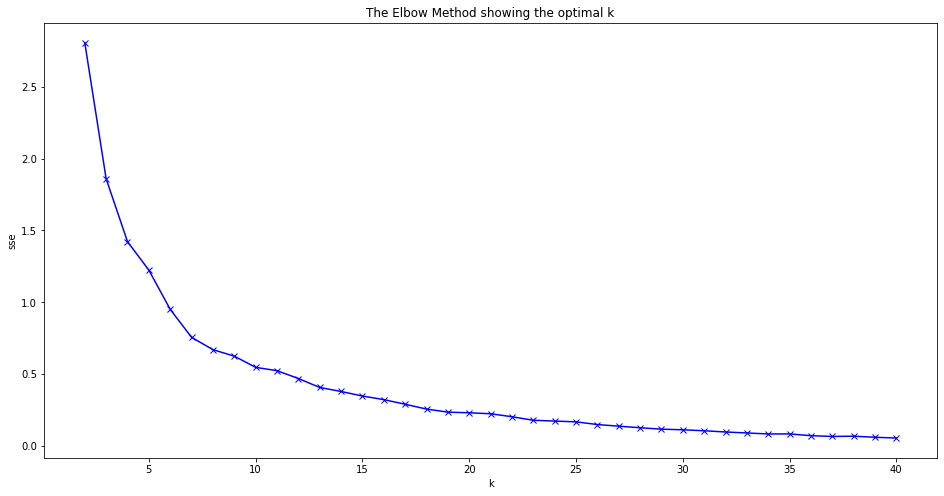

<Figure size 1152x576 with 0 Axes>

In [44]:
plt.figure(figsize=(16,8))
K = range(2,41)
plt.plot(K, sse_list, 'bx-')
plt.xlabel('k')
plt.ylabel('sse')
plt.title('The Elbow Method showing the optimal k')
plt.show()
plt.figure(figsize=(16,8))
#plt.plot(K, sil_list, 'bx-')
plt.show()

In [45]:
km = TimeSeriesKMeans(n_clusters=5, metric="euclidean", n_init=10, max_iter=2000)
km.fit(X_train)

TimeSeriesKMeans(max_iter=2000, n_clusters=5, n_init=10)

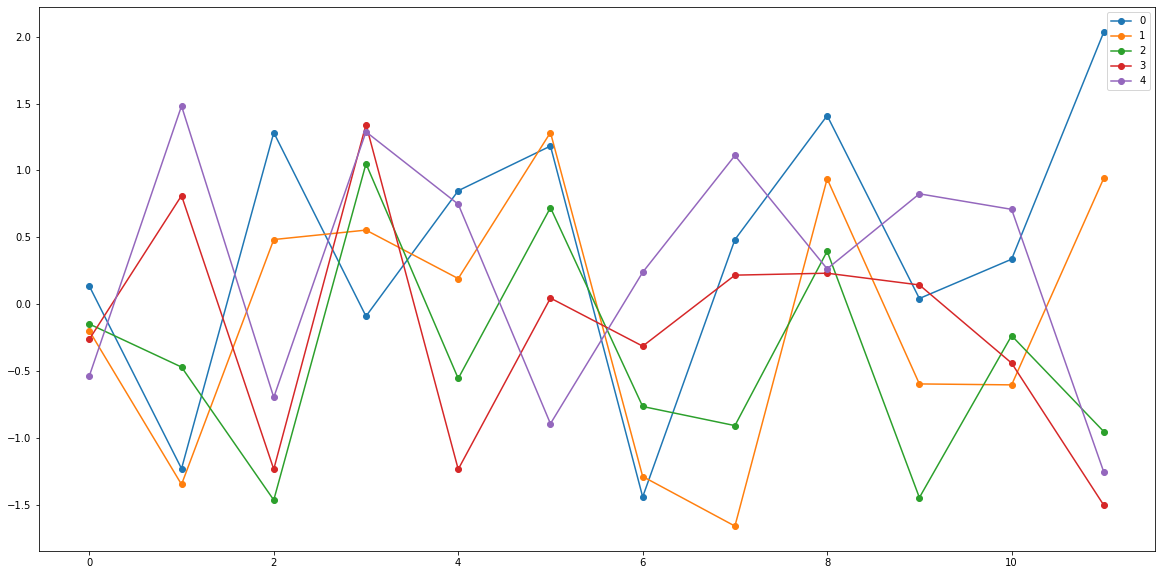

Cluster
0     4
1    50
2    19
3    25
4     2
dtype: int64


In [46]:
plt.figure(figsize=(20,10))
plt.plot(km.cluster_centers_.reshape(X_train.shape[1],5), marker='o', label=[0,1,2,3,4])
plt.legend(fontsize=10)
plt.show()
lab=km.labels_
dic={}
i=0
for k in dataframe_collection.keys():
    dic[k]=lab[i]
    i=i+1
labels=pd.DataFrame.from_dict(dic, columns=['Cluster'],orient='index')
x=labels.groupby('Cluster').size()
print(x)

In [87]:
val=list([4, 50, 19, 25, 2])
names=['cluster_1', 'cluster_2', 'cluster_3','cluster_4','cluster_5']

<BarContainer object of 5 artists>

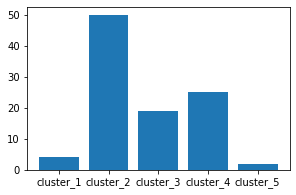

In [94]:
plt.figure(figsize=(16, 3))

plt.subplot(131)
plt.bar(names, val)


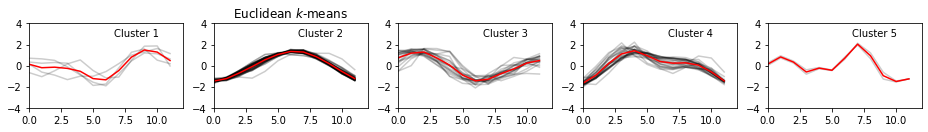

In [47]:
sz = X_train.shape[1]
plt.figure(figsize=(16,9))
for yi in range(5):
    plt.subplot(5, 5, yi + 1)
    for xx in X_train[labels['Cluster'] == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")


For n_clusters = 5 The average silhouette_score is : 0.561357368112333


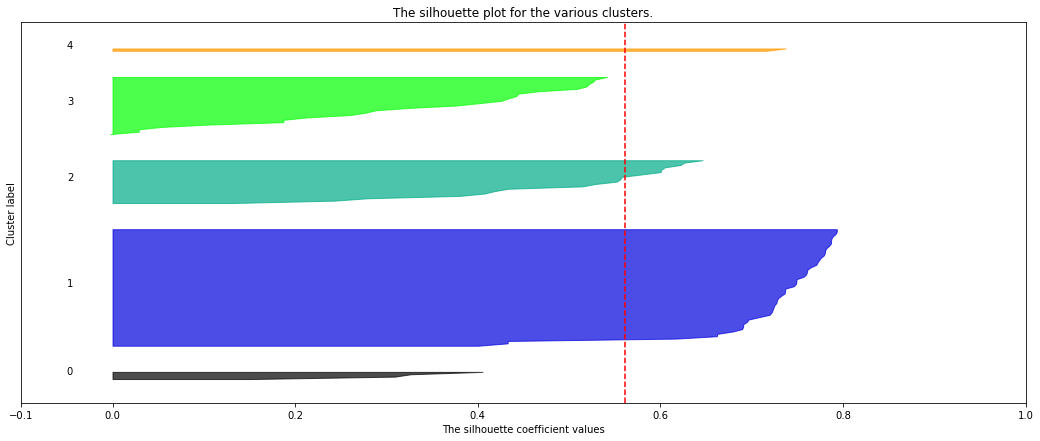

In [49]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
n_clusters=5
# Create a subplot with 1 row and 2 columns
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(AverageTemperature_of_years) + (n_clusters + 1) * 10])



# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X_train.reshape(X_train.shape[0],X_train.shape[1]), km.labels_)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_train.reshape(X_train.shape[0],X_train.shape[1]), km.labels_)

y_lower = 10

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


In [50]:
lab=km.labels_

In [51]:
dic={}
i=0
for k in dataframe_collection.keys():
    dic[k]=lab[i]
    i=i+1

In [52]:
labels=pd.DataFrame.from_dict(dic, columns=['Cluster'],orient='index')

In [53]:
labels

Cluster
Abidjan Côte D'Ivoire                              2
Addis Abeba Ethiopia                               2
Ahmadabad India                                    3
Aleppo Syria                                       1
Alexandria Egypt                                   1
Ankara Turkey                                      1
Baghdad Iraq                                       1
Bangalore India                                    3
Bangkok Thailand                                   3
Belo Horizonte Brazil                              2
Berlin Germany                                     1
Bogotá Colombia                                    4
Bombay India                                       3
Brasília Brazil                                    0
Cairo Egypt                                        1
Calcutta India                                     3
Cali Colombia                                      4
Cape Town South Africa                             2
Casablanca Morocco                                 1
Changchun China                                    1
Chengdu China                                      1
Chicago United States                              1
Chongqing China                                    1
Dakar Senegal                                      1
Dalian China                                       1
Dar Es Salaam Tanzania                             2
Delhi India                                        3
Dhaka Bangladesh                                   3
Durban South Africa                                2
Faisalabad Pakistan                                1
Fortaleza Brazil                                   0
Gizeh Egypt                                        1
Guangzhou China                                    1
Harare Zimbabwe                                    0
Harbin China                                       1
Ho Chi Minh City Vietnam                           3
Hyderabad India                                    3
Ibadan Nigeria                                     2
Istanbul Turkey                                    1
Izmir Turkey                                       1
Jaipur India                                       3
Jakarta Indonesia                                  3
Jiddah Saudi Arabia                                1
Jinan China                                        1
Kabul Afghanistan                                  1
Kano Nigeria                                       3
Kanpur India                                       3
Karachi Pakistan                                   3
Kiev Ukraine                                       1
Kinshasa Congo (Democratic Republic Of The)        2
Lagos Nigeria                                      2
Lahore Pakistan                                    1
Lakhnau India                                      3
Lima Peru                                          2
London United Kingdom                              1
Los Angeles United States                          1
Luanda Angola                                      2
Madras India                                       3
Madrid Spain                                       1
Manila Philippines                                 3
Mashhad Iran                                       1
Melbourne Australia                                2
Mexico Mexico                                      3
Mogadishu Somalia                                  2
Montreal Canada                                    1
Moscow Russia                                      1
Nagoya Japan                                       1
Nagpur India                                       3
Nairobi Kenya                                      2
Nanjing China                                      1
New Delhi India                                    3
New York United States                             1
Paris France                                       1
Peking China                                       1
Pune India                                         3
Rangoon Burma    

In [54]:
average_cluster_euclidean = labels.sort_values('Cluster')

In [55]:
cluster_euclidean = labels.sort_values('Cluster')

In [56]:
cluster_euclidean

Cluster
Fortaleza Brazil                                   0
Harare Zimbabwe                                    0
Surabaya Indonesia                                 0
Brasília Brazil                                    0
Guangzhou China                                    1
Harbin China                                       1
Saint Petersburg Russia                            1
Rome Italy                                         1
Istanbul Turkey                                    1
Izmir Turkey                                       1
Riyadh Saudi Arabia                                1
Jiddah Saudi Arabia                                1
Jinan China                                        1
Kabul Afghanistan                                  1
Peking China                                       1
Paris France                                       1
New York United States                             1
Kiev Ukraine                                       1
Wuhan China                                        1
Nanjing China                                      1
Lahore Pakistan                                    1
Nagoya Japan                                       1
London United Kingdom                              1
Los Angeles United States                          1
Moscow Russia                                      1
Montreal Canada                                    1
Madrid Spain                                       1
Gizeh Egypt                                        1
Faisalabad Pakistan                                1
Xian China                                         1
Cairo Egypt                                        1
Toronto Canada                                     1
Tokyo Japan                                        1
Aleppo Syria                                       1
Alexandria Egypt                                   1
Ankara Turkey                                      1
Baghdad Iraq                                       1
Tianjin China                                      1
Tangshan China                                     1
Taiyuan China                                      1
Berlin Germany                                     1
Taipei Taiwan                                      1
Shenyang China                                     1
Mashhad Iran                                       1
Casablanca Morocco                                 1
Santo Domingo Dominican Republic                   1
Seoul South Korea                                  1
Changchun China                                    1
Chengdu China                                      1
Chicago United States                              1
Chongqing China                                    1
Shanghai China                                     1
Dalian China                                       1
Dakar Senegal                                      1
Santiago Chile                                     2
Nairobi Kenya                                      2
Rio De Janeiro Brazil                              2
Sydney Australia                                   2
Salvador Brazil                                    2
São Paulo Brazil                                   2
Mogadishu Somalia                                  2
Abidjan Côte D'Ivoire                              2
Kinshasa Congo (Democratic Republic Of The)        2
Ibadan Nigeria                                     2
Dar Es Salaam Tanzania                             2
Cape Town South Africa                             2
Melbourne Australia                                2
Lagos Nigeria                                      2
Belo Horizonte Brazil                              2
Lima Peru                                          2
Luanda Angola                                      2
Addis Abeba Ethiopia                               2
Durban South Africa                                2
Ahmadabad India                                    3
Bangkok Thailand                                   3
Bombay India     

## Clustering su ogni anno

In [57]:
years=list(pd.DatetimeIndex(AverageTemperature.index).year.unique())

In [58]:
years.remove(2010)

In [59]:
years

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]

In [60]:
AverageTemperature.reset_index()

index  Abidjan Côte D'Ivoire  Addis Abeba Ethiopia  Ahmadabad India  \
0    2000-02-01                 27.685                19.183           21.246   
1    2000-03-01                 29.061                20.230           26.565   
2    2000-04-01                 28.162                20.398           32.275   
3    2000-05-01                 27.547                19.977           32.847   
4    2000-06-01                 25.812                18.254           32.490   
5    2000-07-01                 24.870                17.109           28.678   
6    2000-08-01                 24.884                16.944           28.616   
7    2000-09-01                 25.405                17.542           29.087   
8    2000-10-01                 26.074                17.113           29.285   
9    2000-11-01                 27.315                17.741           25.577   
10   2000-12-01                 26.929                17.013           21.785   
11   2001-01-01                 26.920                17.454           19.770   
12   2001-02-01                 28.234                18.864           22.438   
13   2001-03-01                 28.706                20.043           27.198   
14   2001-04-01                 27.702                20.233           31.034   
15   2001-05-01                 27.653                19.908           33.358   
16   2001-06-01                 25.940                17.978           30.717   
17   2001-07-01                 24.841                17.011           27.730   
18   2001-08-01                 24.280                17.152           27.893   
19   2001-09-01                 24.797                17.867           29.490   
20   2001-10-01                 26.278                18.047           29.073   
21   2001-11-01                 27.374                17.306           25.516   
22   2001-12-01                 27.598                17.694           22.160   
23   2002-01-01                 27.192                17.901           19.831   
24   2002-02-01                 28.796                19.471           22.333   
25   2002-03-01                 28.564                20.193           27.885   
26   2002-04-01                 28.508                20.097           32.020   
27   2002-05-01                 27.721                20.234           34.317   
28   2002-06-01                 25.972                18.084           32.522   
29   2002-07-01                 25.054                17.518           29.698   
30   2002-08-01                 24.580                17.171           28.036   
31   2002-09-01                 25.260                17.405           28.558   
32   2002-10-01                 26.076                17.324           29.507   
33   2002-11-01                 27.282                17.964           25.437   
34   2002-12-01                 27.087                18.275           22.485   
35   2003-01-01                 27.590                18.201           21.006   
36   2003-02-01                 28.863                19.210           23.304   
37   2003-03-01                 28.980                20.453           27.331   
38   2003-04-01                 28.169                20.270           31.887   
39   2003-05-01                 27.910                20.409           33.511   
40   2003-06-01                 25.993                18.428           32.268   
41   2003-07-01                 25.221                16.861           28.952   
42   2003-08-01                 24.880                17.150           27.820   
43   2003-09-01                 25.737                17.298           28.009   
44   2003-10-01                 26.694                17.137           27.927   
45   2003-11-01                 27.479                17.431           25.657   
46   2003-12-01                 27.092                17.003           21.174   
47   2004-01-01                 27.728                18.983           20.143   
48   2004-02-01                 28.705   

In [61]:
years_collection={}
x=0
y=12
for i in years:  
    years_collection[i]=AverageTemperature.iloc[x:y].T
    x=x+12
    y=y+12

In [62]:
for y in years:
    years_collection[y] = TimeSeriesScalerMeanVariance().fit_transform(years_collection[y])

In [63]:
#year 2000

2000 0


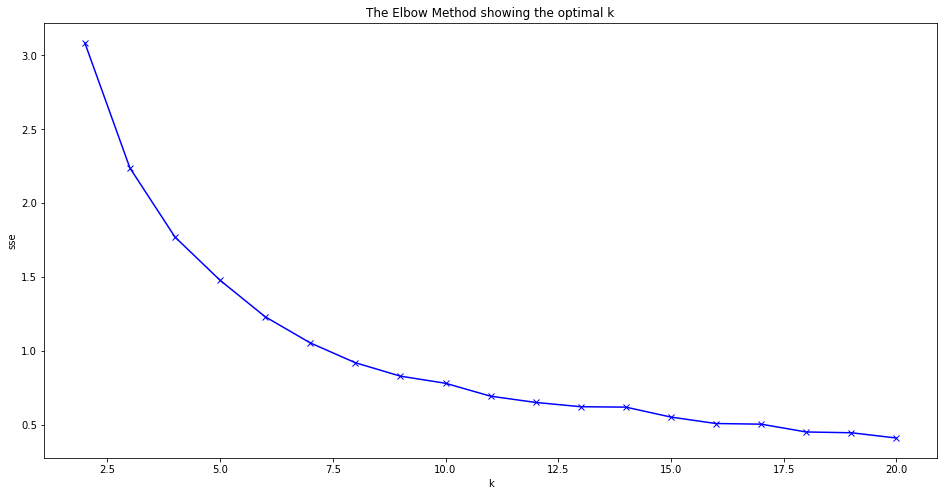

2001 0


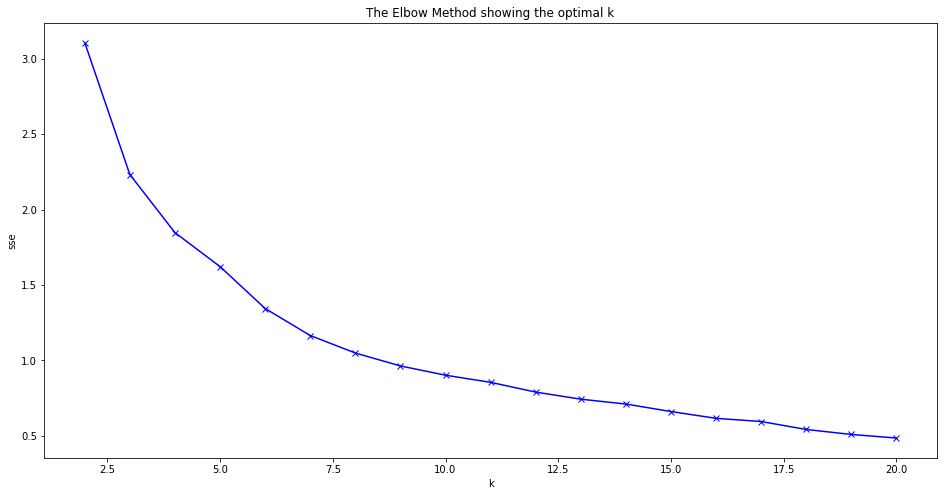

2002 0


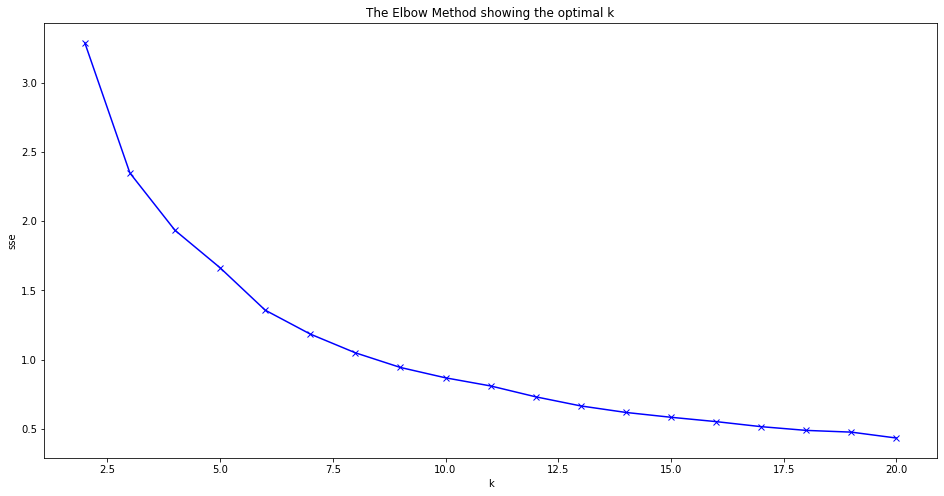

2003 0


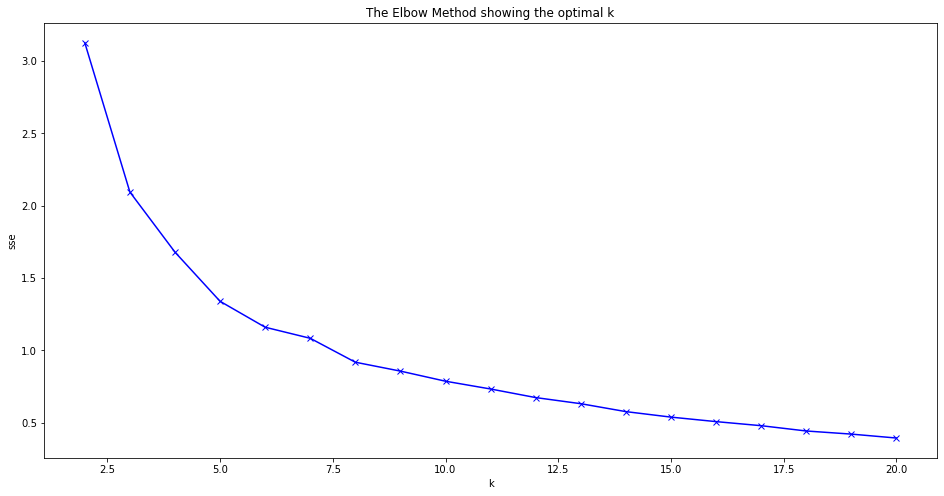

2004 0


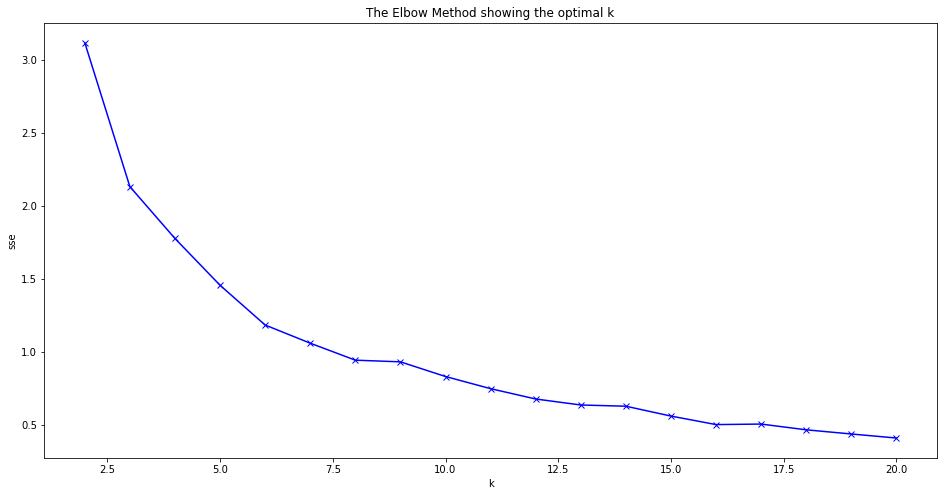

2005 0


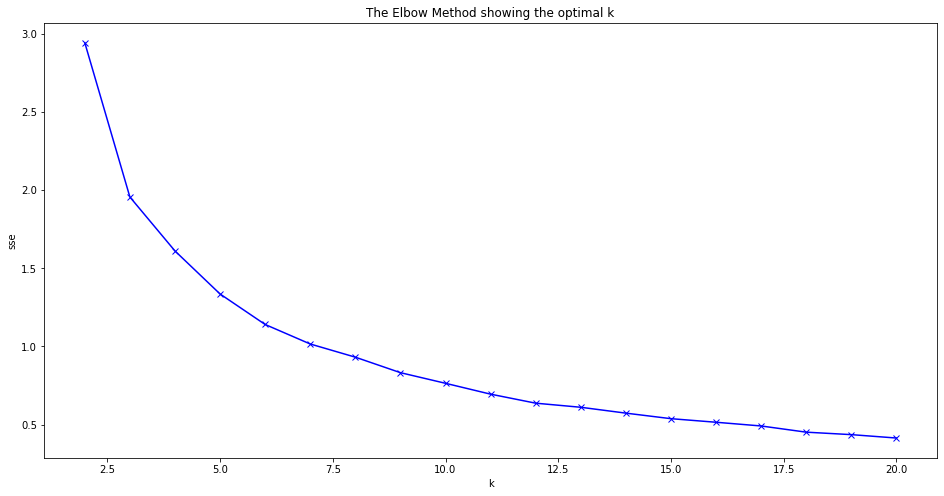

2006 0


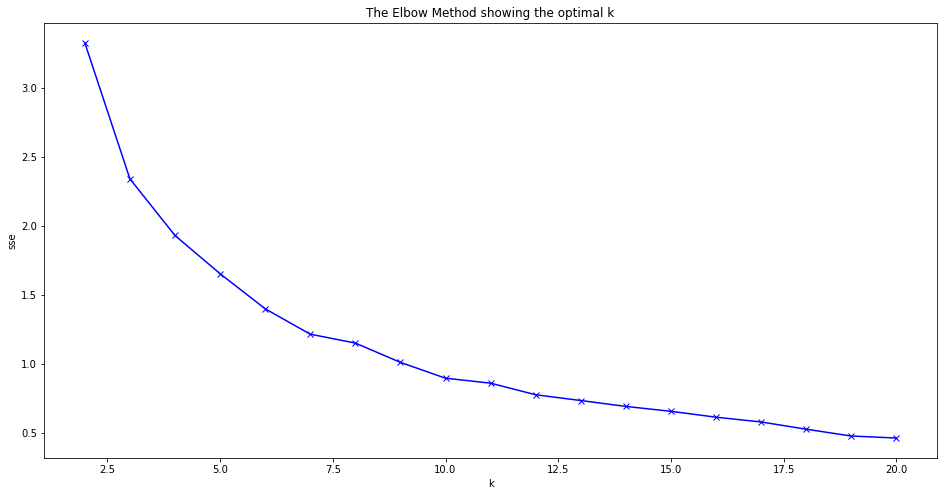

2007 0


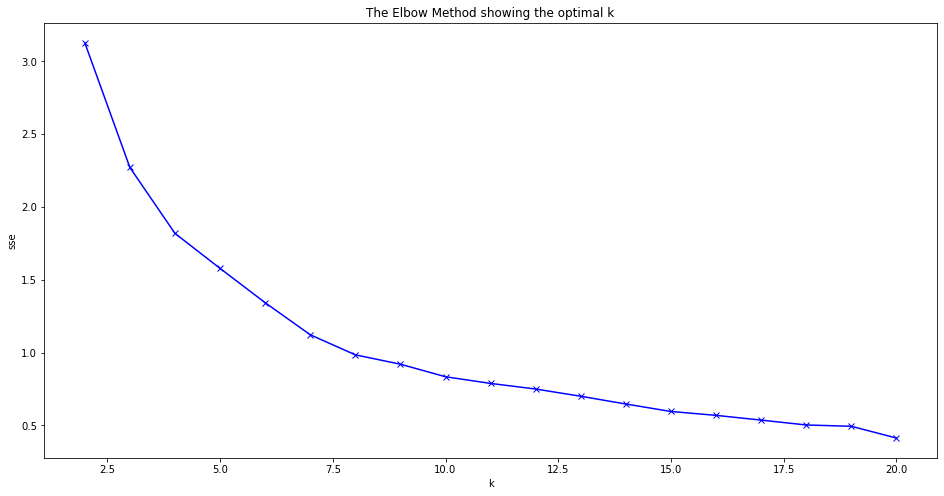

2008 0


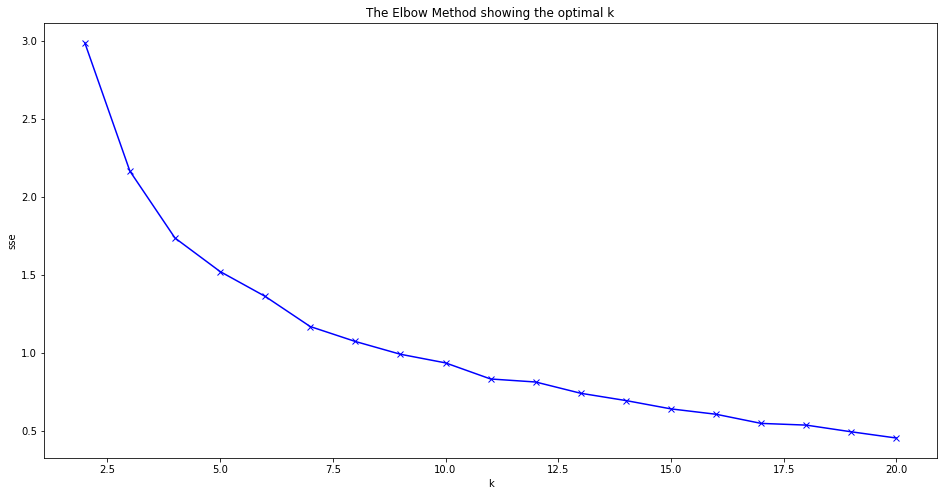

2009 0


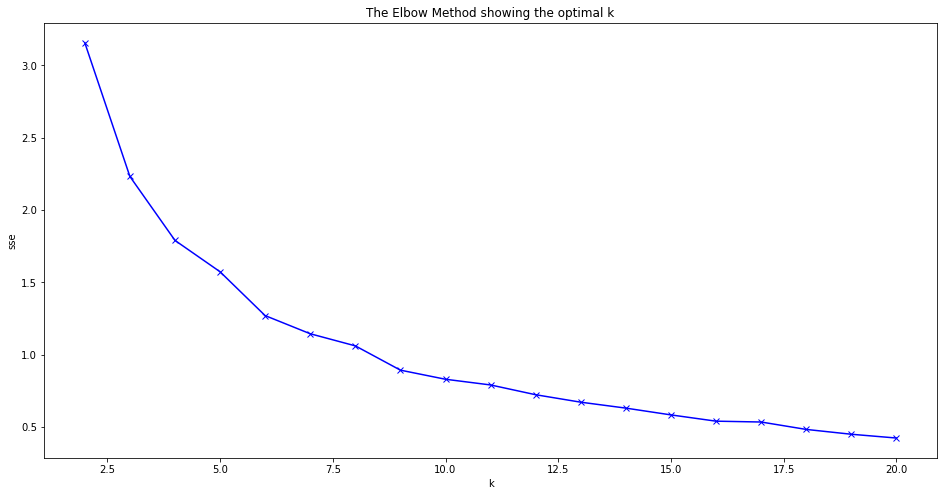

In [64]:
#metodo Usato in lab
#Con metric Euclidean

for y in years:
    
    k=0
    print(y, k)
    max_k = 20
    sse_list = list()
    sil_list=list()
    for k in range(2, max_k + 1):
        kmeans = TimeSeriesKMeans(n_clusters=k, metric="euclidean", n_init=5, max_iter=100)
        kmeans.fit(years_collection[y])
        sse = kmeans.inertia_
        sse_list.append(sse)
        """sil=silhouette_score(years_collection[y], kmeans.labels_)
        sil_list.append(sil)"""
    plt.figure(figsize=(16,8))
    K = range(2,21)
    plt.plot(K, sse_list, 'bx-')
    plt.xlabel('k')
    plt.ylabel('sse')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    """plt.figure(figsize=(16,8))
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('The Elbow Method showing the optimal k')
    plt.plot(K, sil_list, 'bx-')
    plt.show()"""
    n_clusters=5
    


In [65]:
# Incrociando i grafici notiamo che in generale il numero di cluster ottimale e' 5 per ogni anno

Cluster anno  2000


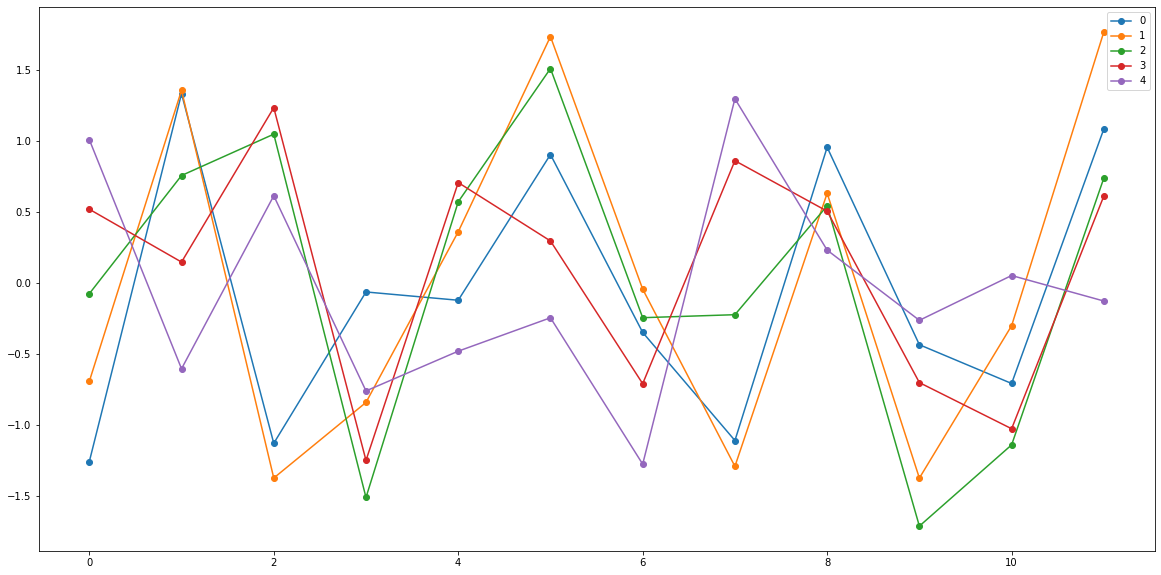

Cluster
0    50
1    19
2     9
3    19
4     3
dtype: int64
Inerzia=  1.4875547913168856
For n_clusters = 5 The average silhouette_score is : 0.10031579263657678
Cluster anno  2001


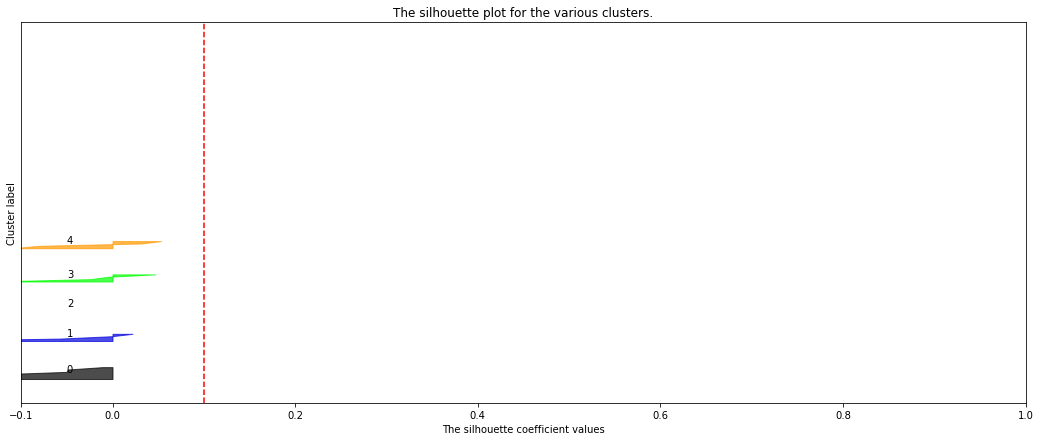

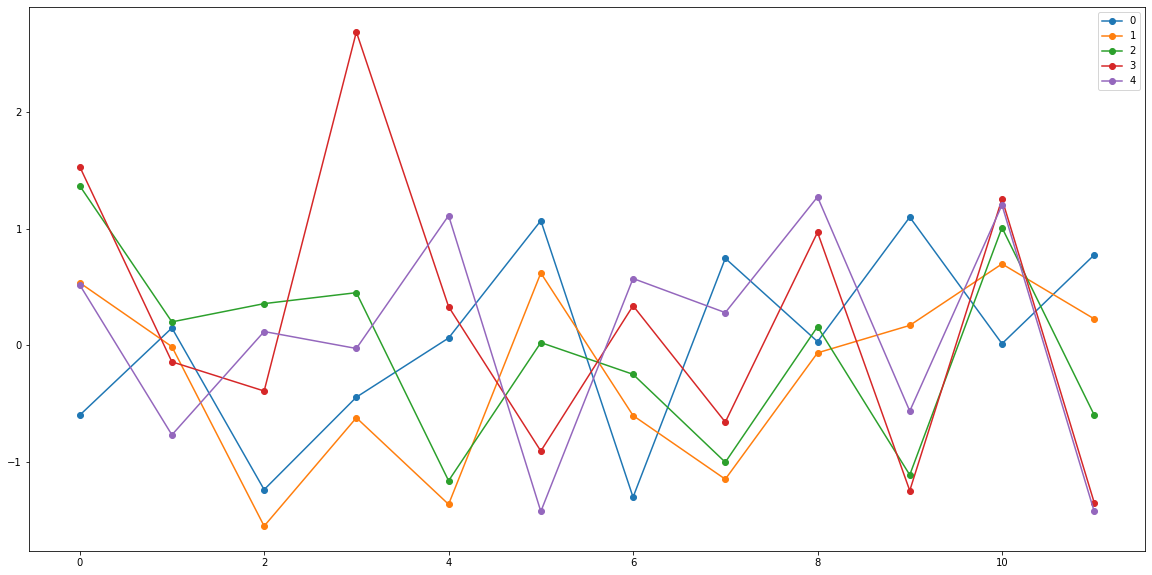

Cluster
0    16
1     2
2    20
3     4
4    58
dtype: int64
Inerzia=  1.6056923712344924
For n_clusters = 5 The average silhouette_score is : 0.11684639591554147
Cluster anno  2002


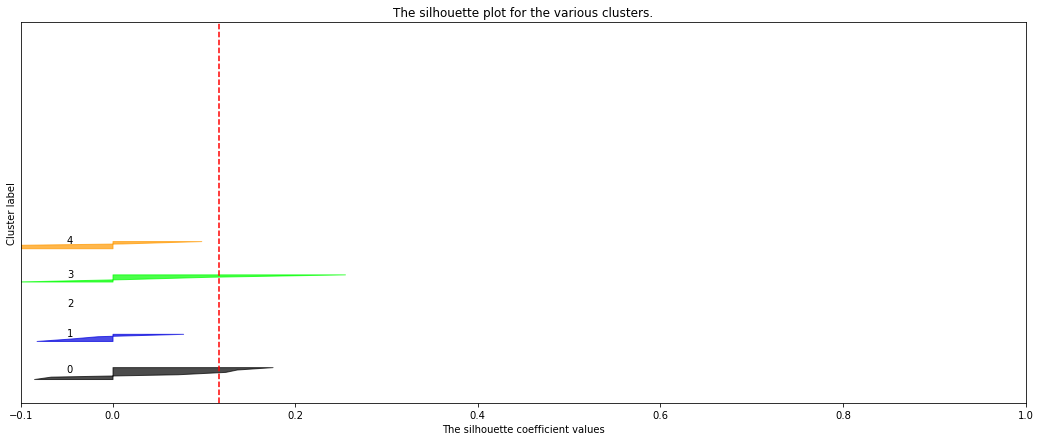

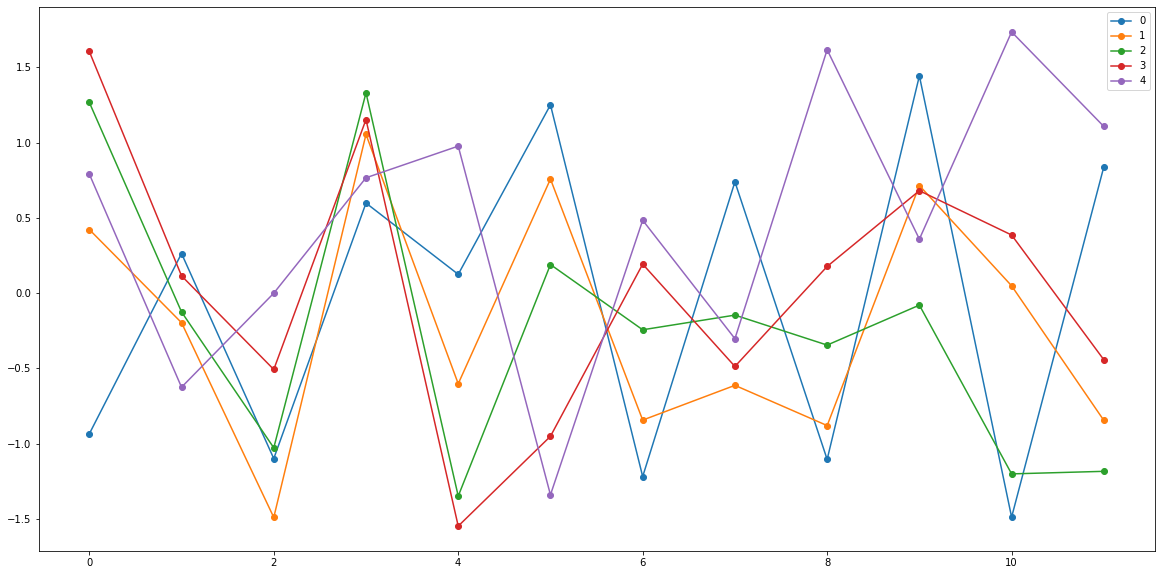

Cluster
0    15
1    60
2    20
3     3
4     2
dtype: int64
Inerzia=  1.6351982639397626
For n_clusters = 5 The average silhouette_score is : 0.1433977397531674
Cluster anno  2003


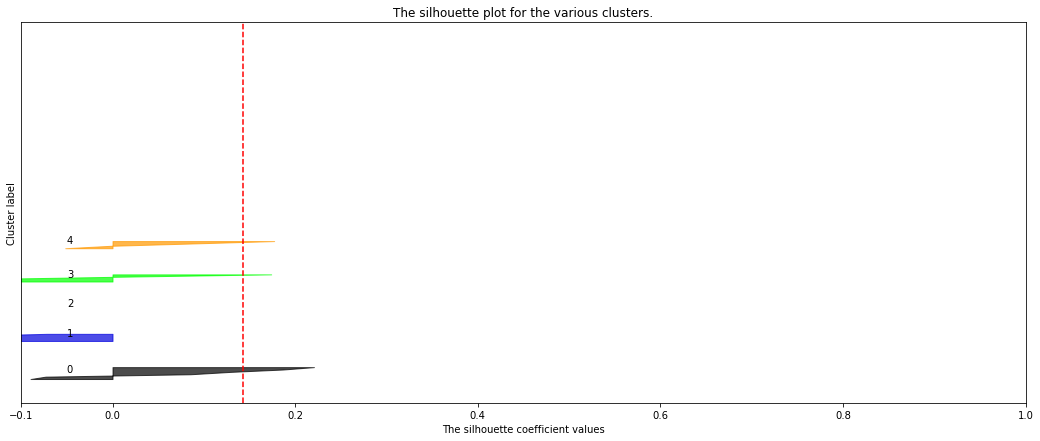

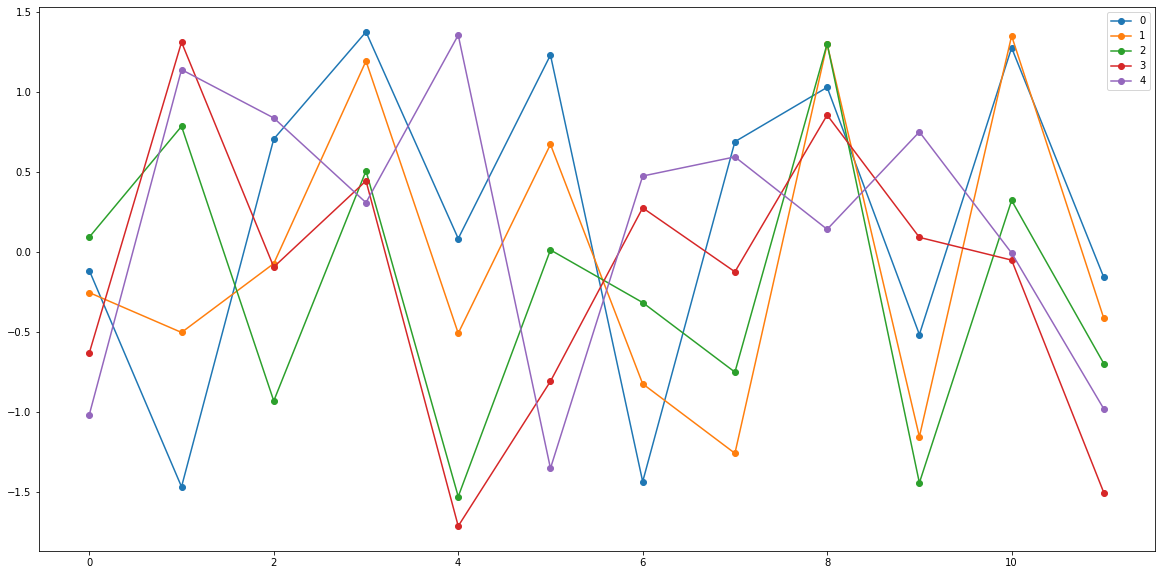

Cluster
0     4
1    17
2    18
3    50
4    11
dtype: int64
Inerzia=  1.447349917000363
For n_clusters = 5 The average silhouette_score is : 0.14627171878089518
Cluster anno  2004


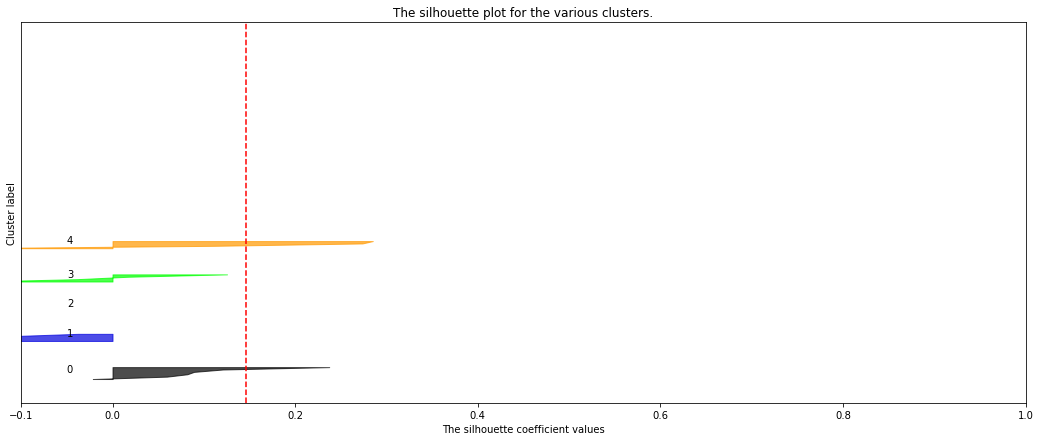

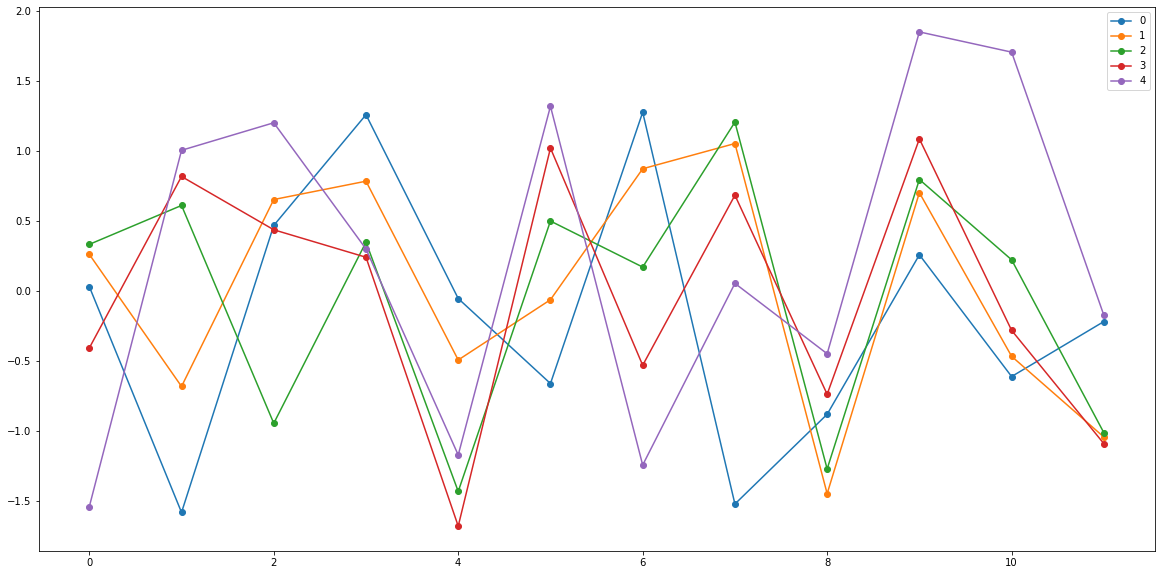

Cluster
0     7
1    25
2    50
3    16
4     2
dtype: int64
Inerzia=  1.430995813833714
For n_clusters = 5 The average silhouette_score is : 0.13294691391302338
Cluster anno  2005


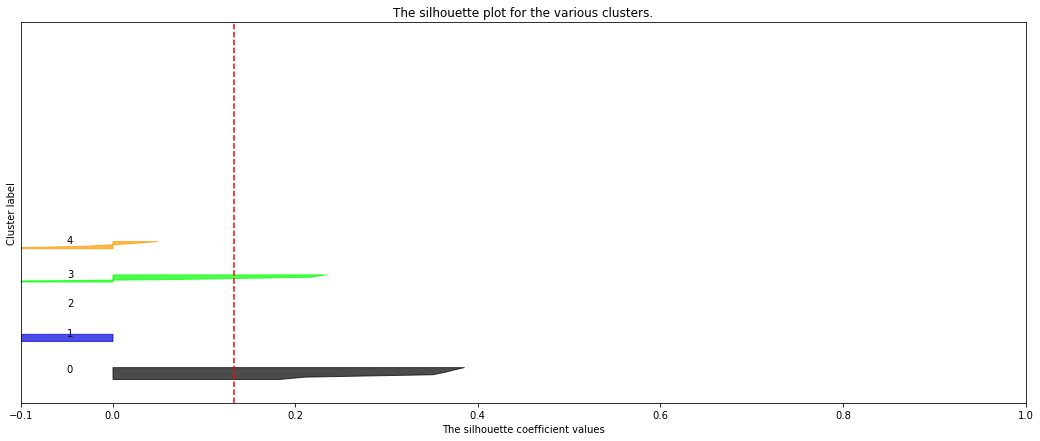

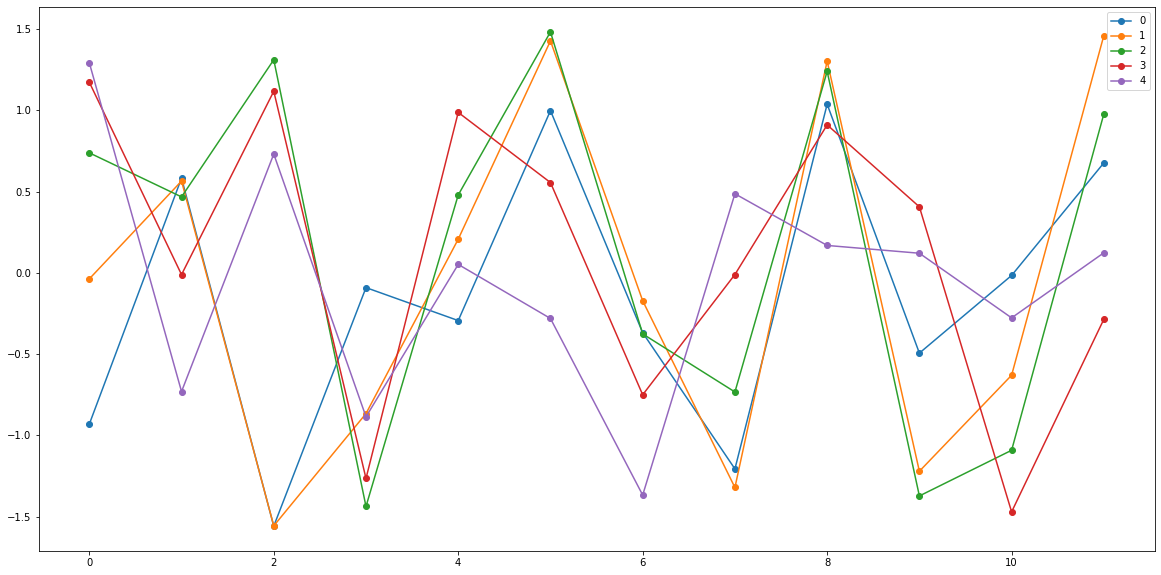

Cluster
0    17
1    16
2    11
3    51
4     5
dtype: int64
Inerzia=  1.3405276434668623
For n_clusters = 5 The average silhouette_score is : 0.1355124121517079
Cluster anno  2006


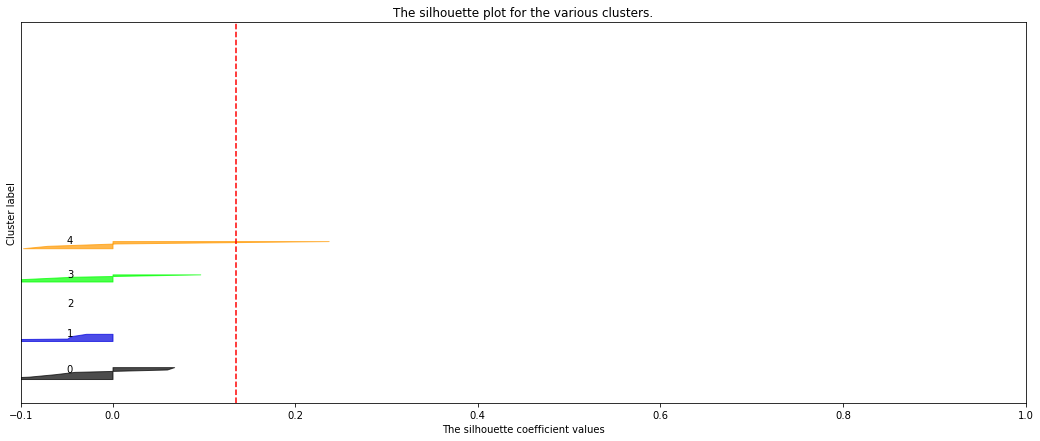

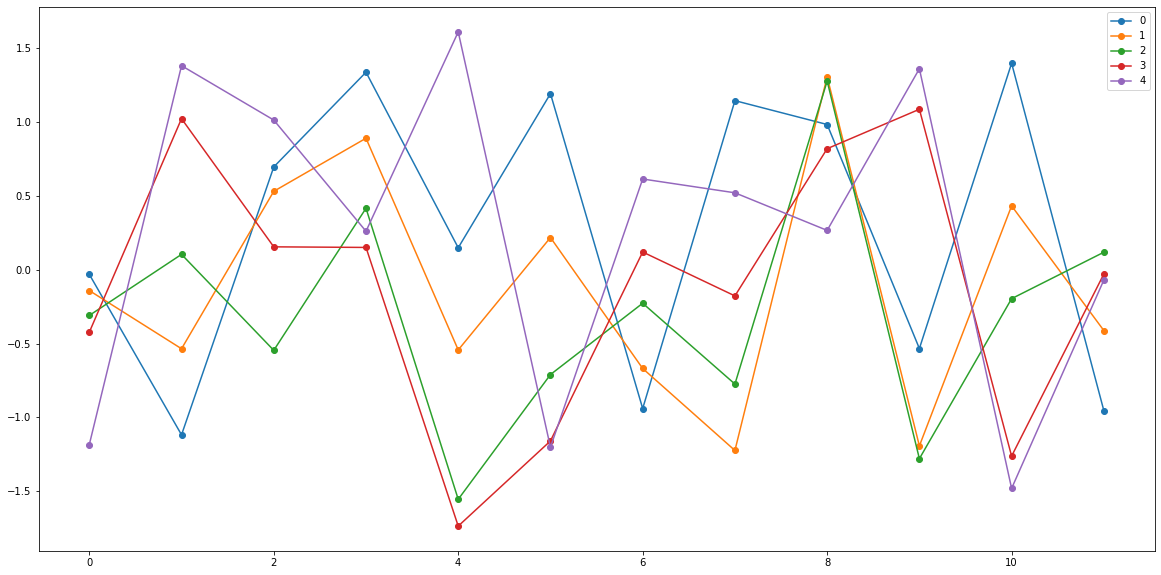

Cluster
0     5
1    23
2    12
3    53
4     7
dtype: int64
Inerzia=  1.677381221761691
For n_clusters = 5 The average silhouette_score is : 0.10777067345756638
Cluster anno  2007


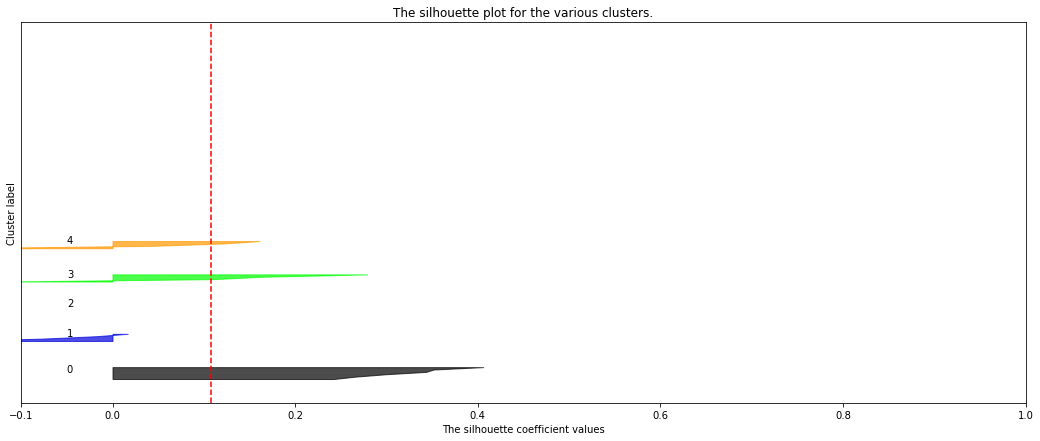

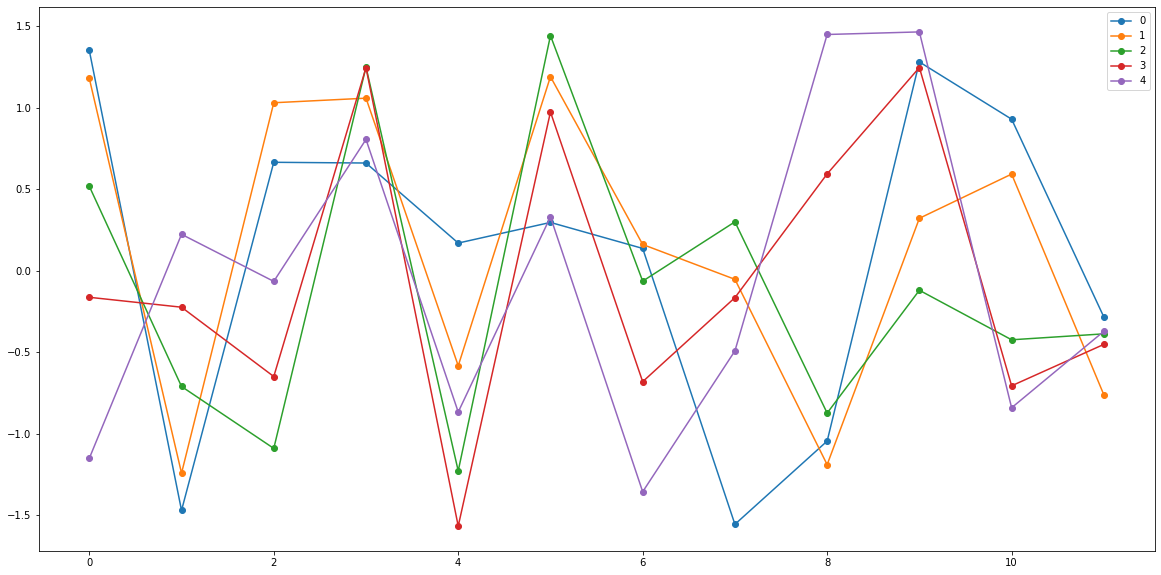

Cluster
0    11
1    54
2    21
3     5
4     9
dtype: int64
Inerzia=  1.5610905079053503
For n_clusters = 5 The average silhouette_score is : 0.09852708586966535
Cluster anno  2008


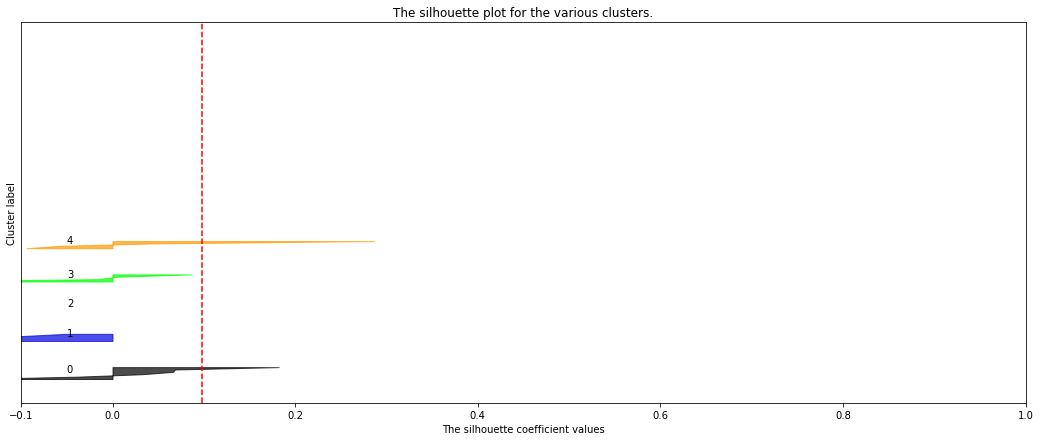

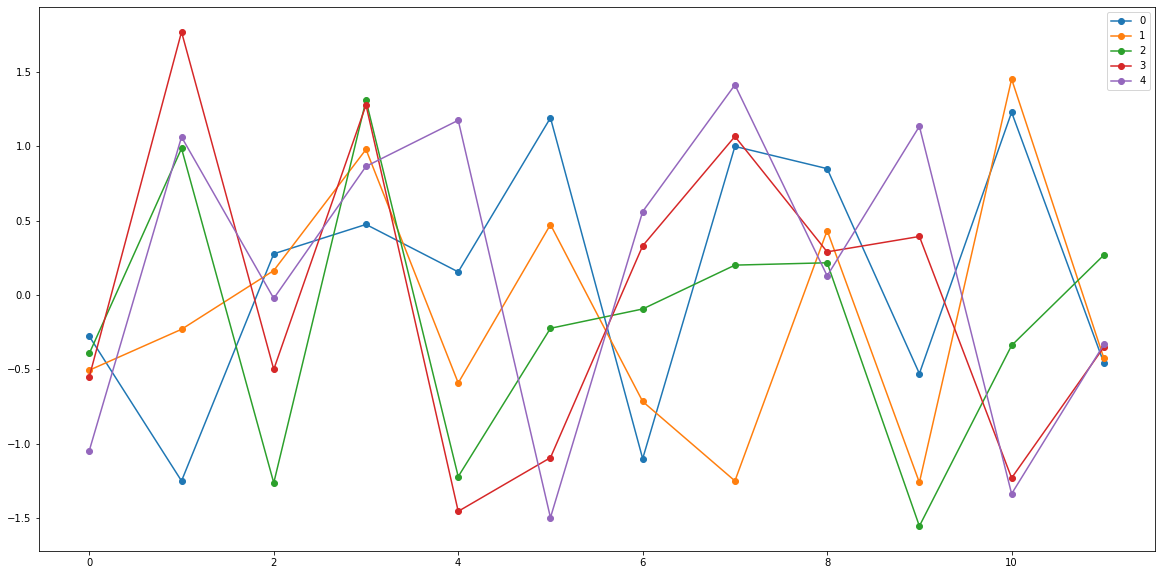

Cluster
0     4
1    52
2    16
3    25
4     3
dtype: int64
Inerzia=  1.547346522586064
For n_clusters = 5 The average silhouette_score is : 0.12153548802959004
Cluster anno  2009


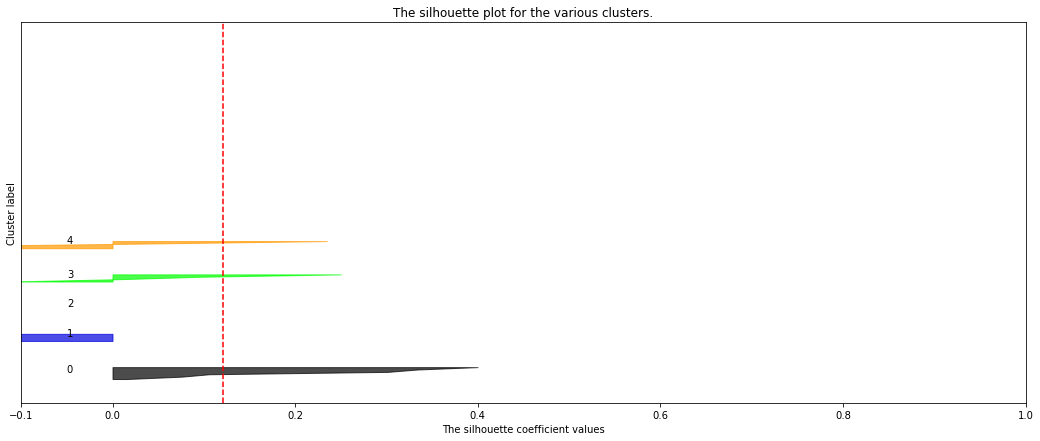

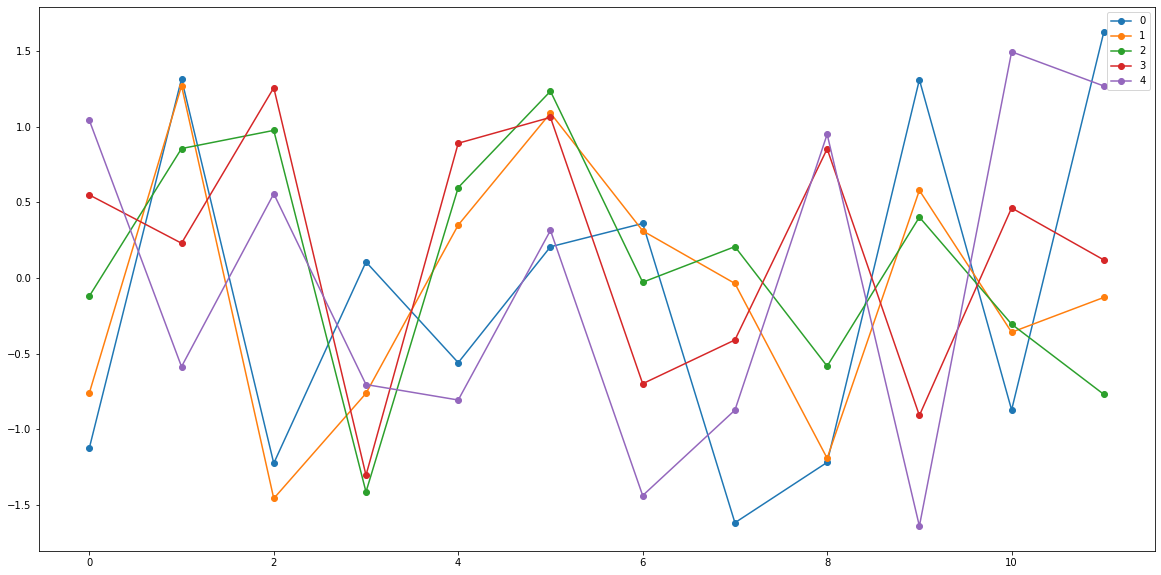

Cluster
0    50
1    18
2    25
3     5
4     2
dtype: int64
Inerzia=  1.5309659589299227
For n_clusters = 5 The average silhouette_score is : 0.2382219669617723


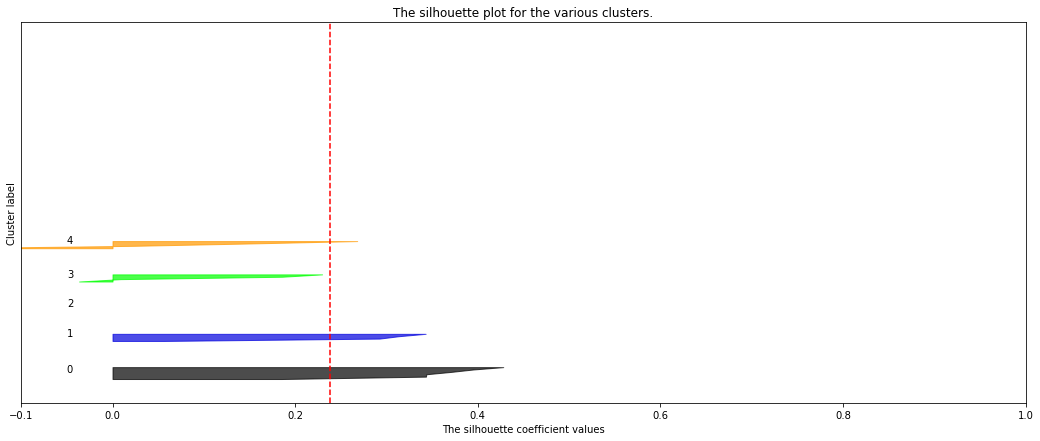

In [66]:
clusters={}
centers={}
X_train
n_clusters=5
for y in years:
    print("Cluster anno ", y)
    km = TimeSeriesKMeans(n_clusters=5, metric="euclidean", max_iter=50, n_init= 5)
    km.fit(years_collection[y])
    plt.figure(figsize=(20,10))
    centers[y]=km.cluster_centers_
    plt.plot(km.cluster_centers_.reshape(years_collection[y].shape[1], 5), marker='o', label=[0,1,2,3,4])
    plt.legend(fontsize=10)
    plt.show()
    lab=km.labels_
    dic={}
    i=0
    for k in dataframe_collection.keys():
        dic[k]=lab[i]
        i=i+1
    labels=pd.DataFrame.from_dict(dic, columns=['Cluster'],orient='index')
    x=labels.groupby('Cluster').size()
    print(x)
    clusters[y]=labels
    print('Inerzia= ', km.inertia_)
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(years_collection[y]) + (n_clusters + 1) * 10])



    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(years_collection[y].reshape(years_collection[y].shape[0],years_collection[y].shape[1]), kmeans.labels_)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(years_collection[y].reshape(years_collection[y].shape[0],years_collection[y].shape[1]), kmeans.labels_)

    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [67]:
clusters[2000]

Cluster
Abidjan Côte D'Ivoire                              1
Addis Abeba Ethiopia                               2
Ahmadabad India                                    3
Aleppo Syria                                       0
Alexandria Egypt                                   0
Ankara Turkey                                      0
Baghdad Iraq                                       0
Bangalore India                                    2
Bangkok Thailand                                   2
Belo Horizonte Brazil                              1
Berlin Germany                                     0
Bogotá Colombia                                    0
Bombay India                                       3
Brasília Brazil                                    4
Cairo Egypt                                        0
Calcutta India                                     3
Cali Colombia                                      0
Cape Town South Africa                             1
Casablanca Morocco                                 0
Changchun China                                    0
Chengdu China                                      0
Chicago United States                              0
Chongqing China                                    0
Dakar Senegal                                      0
Dalian China                                       0
Dar Es Salaam Tanzania                             1
Delhi India                                        3
Dhaka Bangladesh                                   3
Durban South Africa                                1
Faisalabad Pakistan                                3
Fortaleza Brazil                                   4
Gizeh Egypt                                        0
Guangzhou China                                    0
Harare Zimbabwe                                    1
Harbin China                                       0
Ho Chi Minh City Vietnam                           3
Hyderabad India                                    2
Ibadan Nigeria                                     1
Istanbul Turkey                                    0
Izmir Turkey                                       0
Jaipur India                                       3
Jakarta Indonesia                                  2
Jiddah Saudi Arabia                                0
Jinan China                                        0
Kabul Afghanistan                                  0
Kano Nigeria                                       2
Kanpur India                                       3
Karachi Pakistan                                   3
Kiev Ukraine                                       0
Kinshasa Congo (Democratic Republic Of The)        1
Lagos Nigeria                                      1
Lahore Pakistan                                    3
Lakhnau India                                      3
Lima Peru                                          1
London United Kingdom                              0
Los Angeles United States                          0
Luanda Angola                                      1
Madras India                                       3
Madrid Spain                                       0
Manila Philippines                                 2
Mashhad Iran                                       0
Melbourne Australia                                1
Mexico Mexico                                      3
Mogadishu Somalia                                  1
Montreal Canada                                    0
Moscow Russia                                      0
Nagoya Japan                                       0
Nagpur India                                       3
Nairobi Kenya                                      1
Nanjing China                                      0
New Delhi India                                    3
New York United States                             0
Paris France                                       0
Peking China                                       0
Pune India                                         2
Rangoon Burma    

## Evaluate clustering

In [68]:
from sklearn.metrics import jaccard_score

In [69]:
average_cluster_euclidean

Cluster
Fortaleza Brazil                                   0
Harare Zimbabwe                                    0
Surabaya Indonesia                                 0
Brasília Brazil                                    0
Guangzhou China                                    1
Harbin China                                       1
Saint Petersburg Russia                            1
Rome Italy                                         1
Istanbul Turkey                                    1
Izmir Turkey                                       1
Riyadh Saudi Arabia                                1
Jiddah Saudi Arabia                                1
Jinan China                                        1
Kabul Afghanistan                                  1
Peking China                                       1
Paris France                                       1
New York United States                             1
Kiev Ukraine                                       1
Wuhan China                                        1
Nanjing China                                      1
Lahore Pakistan                                    1
Nagoya Japan                                       1
London United Kingdom                              1
Los Angeles United States                          1
Moscow Russia                                      1
Montreal Canada                                    1
Madrid Spain                                       1
Gizeh Egypt                                        1
Faisalabad Pakistan                                1
Xian China                                         1
Cairo Egypt                                        1
Toronto Canada                                     1
Tokyo Japan                                        1
Aleppo Syria                                       1
Alexandria Egypt                                   1
Ankara Turkey                                      1
Baghdad Iraq                                       1
Tianjin China                                      1
Tangshan China                                     1
Taiyuan China                                      1
Berlin Germany                                     1
Taipei Taiwan                                      1
Shenyang China                                     1
Mashhad Iran                                       1
Casablanca Morocco                                 1
Santo Domingo Dominican Republic                   1
Seoul South Korea                                  1
Changchun China                                    1
Chengdu China                                      1
Chicago United States                              1
Chongqing China                                    1
Shanghai China                                     1
Dalian China                                       1
Dakar Senegal                                      1
Santiago Chile                                     2
Nairobi Kenya                                      2
Rio De Janeiro Brazil                              2
Sydney Australia                                   2
Salvador Brazil                                    2
São Paulo Brazil                                   2
Mogadishu Somalia                                  2
Abidjan Côte D'Ivoire                              2
Kinshasa Congo (Democratic Republic Of The)        2
Ibadan Nigeria                                     2
Dar Es Salaam Tanzania                             2
Cape Town South Africa                             2
Melbourne Australia                                2
Lagos Nigeria                                      2
Belo Horizonte Brazil                              2
Lima Peru                                          2
Luanda Angola                                      2
Addis Abeba Ethiopia                               2
Durban South Africa                                2
Ahmadabad India                                    3
Bangkok Thailand                                   3
Bombay India     

In [70]:
average_cluster_euclidean=average_cluster_euclidean.merge(df, left_index=True, right_on='C_C').drop_duplicates('C_C').drop(['Unnamed: 0', 'AverageTemperature', 'AverageTemperatureUncertainty', 'time', 'City', 'Country'], axis=1).sort_values('Cluster')

In [71]:
for k in clusters.keys():
    clusters[k]=clusters[k].merge(df, left_index=True, right_on='C_C').drop_duplicates('C_C').drop(['Unnamed: 0', 'AverageTemperature', 'AverageTemperatureUncertainty', 'time', 'City', 'Country'], axis=1).sort_values('Cluster')

In [72]:
ren_cl={}
for k in clusters.keys():
    ren_cl[k]=clusters[k].sort_values('C_C').rename({'Cluster':'Cl_Y_'+ str(k)}, axis=1)

In [73]:
n_keys=list(clusters.keys())
n_keys.remove(2000)

In [74]:
print(n_keys)

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]


In [75]:
final_df=ren_cl[2000]
for k in n_keys:
    final_df=final_df.merge(ren_cl[k], left_on=['Latitude', 'Longitude', 'C_C'], right_on=['Latitude', 'Longitude', 'C_C'])

In [76]:
cols=['C_C','Latitude', 'Longitude','Cl_Y_2000','Cl_Y_2001','Cl_Y_2002','Cl_Y_2003','Cl_Y_2004','Cl_Y_2005','Cl_Y_2006','Cl_Y_2007','Cl_Y_2008','Cl_Y_2009']

In [77]:
final_df=final_df[cols]

In [78]:
final_df=final_df.merge(average_cluster_euclidean, left_on=['Latitude', 'Longitude', 'C_C'], right_on=['Latitude', 'Longitude', 'C_C']).rename({'Cluster': 'AVG_Cluster'}, axis=1)

In [79]:
final_df.sort_values(['Cl_Y_2000','Cl_Y_2001','Cl_Y_2002','Cl_Y_2003','Cl_Y_2004','Cl_Y_2005','Cl_Y_2006','Cl_Y_2007','Cl_Y_2008','Cl_Y_2009'])

C_C Latitude Longitude  Cl_Y_2000  \
16                                Cali Colombia     4.02    -76.34          0   
11                              Bogotá Colombia     4.02    -74.73          0   
23                                Dakar Senegal    15.27    -17.50          0   
3                                  Aleppo Syria    36.17     37.79          0   
4                              Alexandria Egypt    31.35     30.16          0   
5                                 Ankara Turkey    39.38     33.29          0   
6                                  Baghdad Iraq    32.95     45.00          0   
10                               Berlin Germany    52.24     13.14          0   
14                                  Cairo Egypt    29.74     31.38          0   
18                           Casablanca Morocco    32.95     -6.70          0   
19                              Changchun China    44.20    125.22          0   
20                                Chengdu China    31.35    103.66          0   
21                        Chicago United States    42.59    -87.27          0   
22                              Chongqing China    29.74    107.08          0   
24                                 Dalian China    39.38    120.69          0   
31                                  Gizeh Egypt    29.74     31.38          0   
32                              Guangzhou China    23.31    112.72          0   
34                                 Harbin China    45.81    125.77          0   
38                              Istanbul Turkey    40.99     29.82          0   
39                                 Izmir Turkey    37.78     26.44          0   
42                          Jiddah Saudi Arabia    21.70     38.94          0   
43                                  Jinan China    36.17    117.35          0   
44                            Kabul Afghanistan    34.56     70.05          0   
48                                 Kiev Ukraine    50.63     31.69          0   
54                        London United Kingdom    52.24     -0.00          0   
55                    Los Angeles United States    34.56   -118.70          0   
58                                 Madrid Spain    40.99     -4.26          0   
60                                 Mashhad Iran    36.17     59.67          0   
64                              Montreal Canada    45.81    -72.69          0   
65                                Moscow Russia    55.45     36.85          0   
66                                 Nagoya Japan    34.56    136.22          0   
69                                Nanjing China    31.35    118.74          0   
71                       New York United States    40.99    -74.56          0   
72                                 Paris France    49.03      2.45          0   
73                                 Peking China    39.38    116.53          0   
77                          Riyadh Saudi Arabia    24.92     46.11          0   
78                                   Rome Italy    42.59     13.09          0   
79                      Saint Petersburg Russia    60.27     29.19          0   
82             Santo Domingo Dominican Republic    18.48    -69.30          0   
83                            Seoul South Korea    37.78    126.10          0   
84                               Shanghai China    31.35    120.63          0   
85                               Shenyang China    40.99    123.55          0   
91                                Taipei Taiwan    24.92    122.36          0   
92                                Taiyuan China    37.78    111.86          0   
93                               Tangshan China    37.78    113.90          0   
94                                Tianjin China    39.38    116.53          0   
95                                  Tokyo Japan    36.17    139.23          0   
96                               Toronto Canada    44.20    -80.50          0   
98                                  Wuhan China    29.74    114.46         

In [80]:
final_df.sort_values('AVG_Cluster')

C_C Latitude Longitude  Cl_Y_2000  \
30                             Fortaleza Brazil    -4.02    -40.98          4   
33                              Harare Zimbabwe   -18.48     30.42          1   
87                           Surabaya Indonesia    -7.23    112.70          4   
13                              Brasília Brazil   -15.27    -47.50          4   
32                              Guangzhou China    23.31    112.72          0   
34                                 Harbin China    45.81    125.77          0   
79                      Saint Petersburg Russia    60.27     29.19          0   
78                                   Rome Italy    42.59     13.09          0   
38                              Istanbul Turkey    40.99     29.82          0   
39                                 Izmir Turkey    37.78     26.44          0   
77                          Riyadh Saudi Arabia    24.92     46.11          0   
42                          Jiddah Saudi Arabia    21.70     38.94          0   
43                                  Jinan China    36.17    117.35          0   
44                            Kabul Afghanistan    34.56     70.05          0   
73                                 Peking China    39.38    116.53          0   
72                                 Paris France    49.03      2.45          0   
71                       New York United States    40.99    -74.56          0   
48                                 Kiev Ukraine    50.63     31.69          0   
98                                  Wuhan China    29.74    114.46          0   
69                                Nanjing China    31.35    118.74          0   
51                              Lahore Pakistan    31.35     73.51          3   
66                                 Nagoya Japan    34.56    136.22          0   
54                        London United Kingdom    52.24     -0.00          0   
55                    Los Angeles United States    34.56   -118.70          0   
65                                Moscow Russia    55.45     36.85          0   
64                              Montreal Canada    45.81    -72.69          0   
58                                 Madrid Spain    40.99     -4.26          0   
31                                  Gizeh Egypt    29.74     31.38          0   
29                          Faisalabad Pakistan    31.35     73.51          3   
99                                   Xian China    34.56    108.97          0   
14                                  Cairo Egypt    29.74     31.38          0   
96                               Toronto Canada    44.20    -80.50          0   
95                                  Tokyo Japan    36.17    139.23          0   
3                                  Aleppo Syria    36.17     37.79          0   
4                              Alexandria Egypt    31.35     30.16          0   
5                                 Ankara Turkey    39.38     33.29          0   
6                                  Baghdad Iraq    32.95     45.00          0   
94                                Tianjin China    39.38    116.53          0   
93                               Tangshan China    37.78    113.90          0   
92                                Taiyuan China    37.78    111.86          0   
10                               Berlin Germany    52.24     13.14          0   
91                                Taipei Taiwan    24.92    122.36          0   
85                               Shenyang China    40.99    123.55          0   
60                                 Mashhad Iran    36.17     59.67          0   
82             Santo Domingo Dominican Republic    18.48    -69.30          0   
83                            Seoul South Korea    37.78    126.10          0   
84                               Shanghai China    31.35    120.63          0   
19                              Changchun China    44.20    125.22          0   
20                                Chengdu China    31.35    103.66         

In [81]:
#Notiamo dal dataframe che contiene i cluster generato sui dati di ogni anno,che il cluster effettuato sulla serie temporae media AVG_Cluster
#coincide anche con quello effettuato sui 10 anni distinti, infatti vediamo che le citta raggruppate insieme da AVG_Cluster
#condividono tra loro la maggioranza dei cluster annuali

<AxesSubplot:>

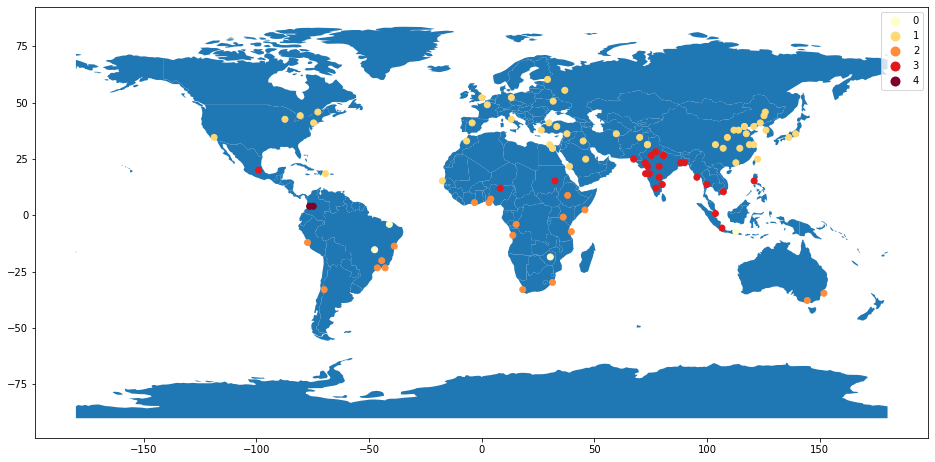

In [82]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from descartes.patch import PolygonPatch


finc = [Point(xy) for xy in zip(final_df['Longitude'].astype(float), final_df['Latitude'].astype(float))]
gdffin = GeoDataFrame(final_df[['Longitude','Latitude','AVG_Cluster']], geometry=finc) 

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdffin.plot(ax=world.plot(figsize=(16, 9)), column='AVG_Cluster',cmap='YlOrRd', categorical=True,legend=True)

